<a href="https://colab.research.google.com/github/araldi/FS22---Big-Data-Analysis-in-Biomedical-Research-376-1723-00L/blob/main/Week5/Statistics_part2_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import pylab as pl
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

import scipy as sp
from scipy import stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
df = pd.read_csv('https://github.com/araldi/HS21---Big-Data-Analysis-in-Biomedical-Research-376-1723-00L-/blob/main/Week5/Week5_statistics_exercise.csv?raw=true')

In [ ]:
df.head()

,Unnamed: 0,eid,31-0.0,48-0.0,49-0.0,50-0.0,2443-0.0,21002-0.0,21022-0.0,23099-0.0,30740-0.0,30750-0.0,30760-0.0,30770-0.0,30780-0.0
0,281147,3811815,0.0,94.0,109.0,161.0,0.0,84.1,54.0,46.9,5.032,35.6,1.287,24.253,4.501
1,51158,1511686,0.0,67.0,96.0,160.0,0.0,61.9,41.0,28.6,3.671,31.7,1.059,22.127,5.275
2,167746,2677649,0.0,78.0,108.0,167.5,0.0,69.2,55.0,34.7,5.234,25.5,1.423,19.969,3.603
3,381947,4820009,1.0,88.0,101.0,184.0,0.0,79.5,45.0,14.1,4.665,35.1,2.018,28.842,3.060
4,114270,2142869,0.0,76.0,98.0,156.0,0.0,59.0,60.0,25.4,5.192,40.1,1.581,24.269,5.010


In [ ]:
# calculate BMI
df['BMI']= df['21002-0.0'] / np.power(df['50-0.0']/100,2)

# Null hypothesis testing

Let's test if the observed differences between BMI in males and females are due to randomness.

In [ ]:
# What is the observed difference between male and female BMI?

# mean of BMI of males
np.mean(df[df['31-0.0'] == 1]['BMI']) 

27.866019956496995

In [ ]:
# mean of BMI of females
np.mean(df[df['31-0.0'] == 0]['BMI']) 

27.083051213959653

In [ ]:
observed_difference = np.mean(df[df['31-0.0'] == 1]['BMI']) - np.mean(df[df['31-0.0'] == 0]['BMI']) 

In [ ]:
observed_difference

0.7829687425373422

In [ ]:
# Test if the null hypothesis is true

#null hypothesis: BMI in males and females is identical
# random sampling of males should give us differences compared to the whole male population 
# that are as extreme or more than the differences with the female population

# the null hypothesis array will contain the difference between samples of the male population
# then we will test how many times the null array is bigger than the observed difference between males and females

null_hypothesis = np.empty(1)
df_males = df[df['31-0.0'] == 1]
# let's simulate the sampling in the same population (male)
for i in range(1000):
  males_sample = np.mean(df_males['BMI'].sample(100))
  difference = males_sample-np.mean(df_males['BMI'])
  null_hypothesis = np.append(null_hypothesis, difference)

In [ ]:
# let's compare the sampling in males with the observed differences
chances_true_null_hypothesis = np.mean(null_hypothesis >= observed_difference)
np.mean(null_hypothesis >= observed_difference)

0.03996003996003996

In [ ]:
print('The chances of the female and males having identical BMI distribution is {:.3%}'.format(chances_true_null_hypothesis))

The chances of the female and males having identical BMI distribution is 4.296%


# Significance and p-value

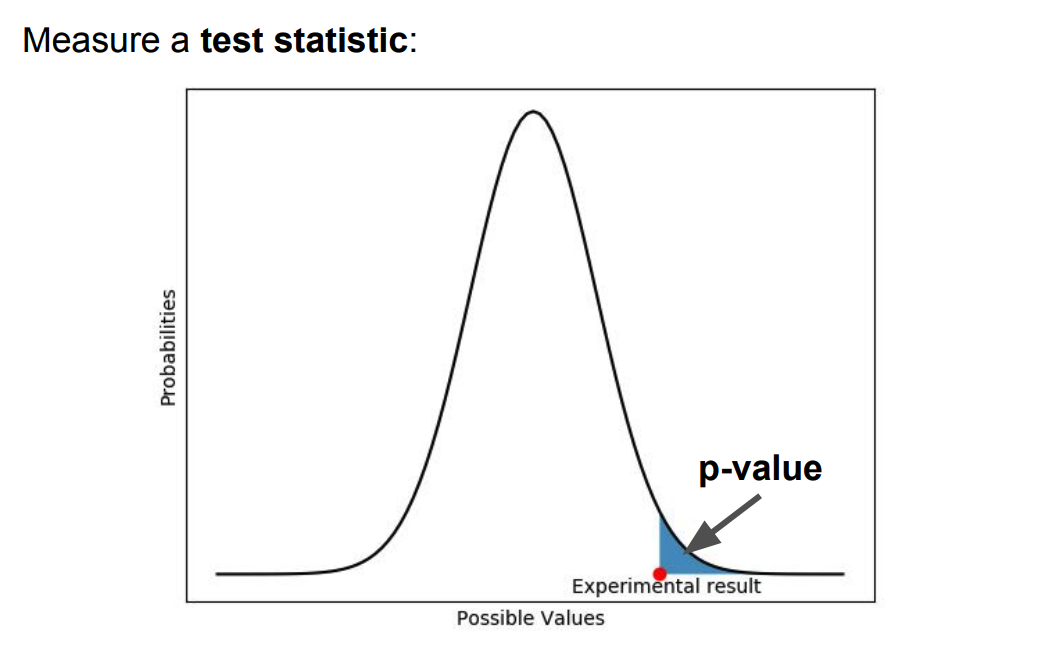

# Z-test

Z-test is a test to determine if a samples has different mean from the population. 

The $Z$ statistics is : $Z = \frac{\bar{X} - \mu }{s}$ and $s = \sigma / \sqrt(N)$



Certain conditions must hold true in the data in order to properly utilize z-tests.

1) Population mean and population standard deviation must be known.

2) Sample mean is known.

3) Assumption or test that the sample of data offers some variation and therefore would form a normal distribution by resampling - consistent with the Central Limit Theorem.

4) Sample observations were randomly drawn from a population.

5) Sample size is known and sufficiently large - often n>=30.

6) Assumption that the population from which the sample is drawn from is approximately normal.




Weaknesses of z-test:

* Need the true population mean
* Need the true population standard deviation

Usually, we only have access to the sample mean and standard deviation. In this case, a Student's t-test is appropriate.

### Null hypothesis testing steps

**1.   Take measurements from a large control group we'll call the population.**




In [ ]:
# Population: males. Measurement: BMI
df_males = df[df['31-0.0'] == 1]
df_males.dropna(subset=['BMI'], inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
# calculate mean and std of the population from scratch
sum_BMI = 0
sum_std = 0

for i in df_males['BMI']:
  sum_BMI = sum_BMI + i
pop_mean = sum_BMI/len(df_males['BMI'])

for i in df_males['BMI']:
  sum_std = sum_std + (i - pop_mean)**2
mean_std = sum_std/len(df_males['BMI'])
pop_std = sqrt(mean_std)

In [ ]:
# let's show a sampling distribution of the population
# let's create 500 samples of 100 individuals each
import random
np.random.seed(2022)

sample_means = []
n= 100
for sample in range(0, 500):
    sample_values = random.sample(list(df_males['BMI']), n)    
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


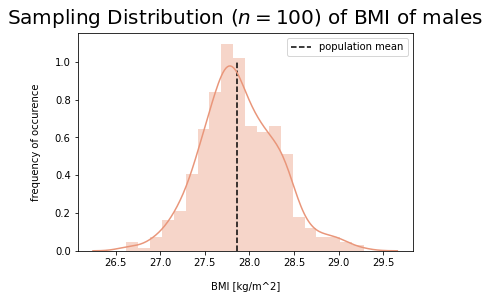

In [ ]:
sns.distplot(sample_means, color='darksalmon')
plt.title("Sampling Distribution ($n=100$) of BMI of males", y=1.015, fontsize=20)
plt.xlabel("BMI [kg/m^2]", labelpad=14)
plt.vlines(x = pop_mean, ymin = 0, ymax=1, linestyle = '--', label = 'population mean')
plt.legend()
plt.ylabel("frequency of occurence", labelpad=14);

**2. Declare a null and alternative hypothesis.
Is it a right-tailed, left-tailed or two-tailed test?**

*Null hypothesis*: Males taller than 180cm have equal BMI to males in the population.



*Alternative hypothesis*: Males taller than 180cm have DIFFERENT BMI compared to males in the population


*Alternative hypothesis*: Males taller than 180cm have HIGHER BMI than males in the population--> right-tailed


*Alternative hypothesis*: Males taller than 180cm have LOWER BMI than males in the population --> left-tailed


**3. Decide on an alpha level - the probability of obtaining a sample mean with treatment from the population.**

Alpha level will be 0.05

**4. Apply a treatment to a new sample group of size n and record measurements.**



In [ ]:
# two samples of the population (independent)

sample1 = random.sample(list(df_males[(df_males['50-0.0'] > 180)]['BMI']), 1000)
sample2 = random.sample(list(df_males[(df_males['50-0.0'] <= 180) ]['BMI']), 1000)

**5. Take a sufficient number of samples of size n from the population values 
and record a single statistic of each sample such as the mean or median. 
This is called the sampling distribution.
For example: take 1000 males taller than 180cm or shorter than 180cm as sampling distribution.**

In [ ]:
sample1_mean = np.mean(sample1)

sample2_mean = np.mean(sample2)

In [ ]:
print("The mean of men taller than 180 is {:.3f}".format(sample1_mean))

The mean of men taller than 180 is 27.468


In [ ]:
print("The mean of men shorter than 180 is {:.3f}".format(sample2_mean))

The mean of men shorter than 180 is 27.752


**6. Verify data collected meets the requirements needed to run a z-test (see above).**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


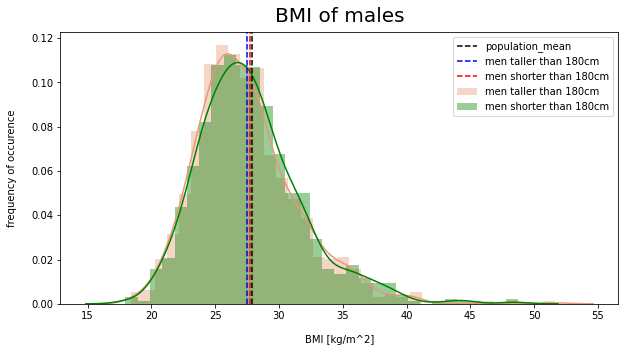

In [ ]:
## does the data follow a normal distribution?

## Are there more than 30 data points?

# let's display the above distribution
plt.figure(figsize = (10,5))
sns.distplot(sample1, color='darksalmon', label ='men taller than 180cm')
sns.distplot(sample2, color='green', label ='men shorter than 180cm')

plt.title("BMI of males", y=1.015, fontsize=20)
plt.xlabel("BMI [kg/m^2]", labelpad=14)
plt.axvline(x = pop_mean,  linestyle = '--', color = 'k', label= 'population_mean')
plt.axvline(x = np.mean(sample1),  linestyle = '--', color = 'b', label = 'men taller than 180cm')
plt.axvline(x = np.mean(sample2), linestyle = '--', color = 'r', label = 'men shorter than 180cm')
plt.legend()
plt.ylabel("frequency of occurence", labelpad=14);

**7. Calculate the standard deviation of the sampling distribution - called the standard error.**

In [ ]:
std_err1 = np.std(df_males['BMI'])/sqrt(len(sample1))
std_err2 = np.std(df_males['BMI'])/sqrt(len(sample2))


**8. Compute how many standard errors the statistic (such as the mean) of the sample group 
with treatment is from the statistic (such as the mean) of the sampling distribution. 
This is called the z-score.**

In [ ]:
z_score_sample1 = (np.mean(df_males['BMI']) - np.mean(sample1))/ (np.std(df_males['BMI'])/sqrt(len(sample1)))

In [ ]:
z_score_sample1

2.954373453768695







**9. Determine if this sample group with treatment is significantly different from the population based on the pre-decided alpha level.**

Calculate the p-value from the two Z-scores, using the distribution of probability of the normal gaussian for a critical value obtained with:


In [ ]:
import scipy
scipy.stats.norm.sf(abs(z_score_sample1))

0.001566523080699466

Is this sample group with treatment significantly different from the population?

## Exercise 1

* Do females with BMI >25 kg/m^2 have higher LDL compared to the female population?

* Do females shorter than 160cm have glycated haemoglobin lower comparet do the females of the population?


Obtain the treatment sample, decide on the alpha, calculate Z-score of each sample vs population, and determined if the samples are significantly different from the population.



In [ ]:
# retrieve fields for glycated haemoglobin and LDL
dict1 = pd.read_csv('https://github.com/araldi/HS21---Big-Data-Analysis-in-Biomedical-Research-376-1723-00L-/raw/main/Week3/Week3_homework_dictionary_part1.csv')

In [ ]:
dict1

,Description,Code
0,PatientID,eid
1,Gender,31-0.0
2,Height [cm],50-0.0
3,Weight [Kg],21002-0.0
4,Waist circumference [cm],48-0.0
5,Hip circumference [cm],49-0.0
6,Body_fat_percentage [%],23099-0.0
7,Diabetes diagnosed by doctor,2443-0.0
8,AgeRecruit,21022-0.0
9,Glucose [mmol/L],30740-0.0


In [ ]:
females = df[(df['31-0.0'] == 0)]
females.dropna(subset= ['BMI', '30780-0.0', '30750-0.0'], inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
BMI25 = females[females['BMI'] >25].sample(500)
Z_score1 = (np.mean(females['30780-0.0']) - np.mean(BMI25['30780-0.0']) )/(np.std(females['30780-0.0'])/sqrt(len(BMI25)))

In [ ]:
Z_score1

-2.0737132073413744

In [ ]:
import scipy
scipy.stats.norm.sf(abs(Z_score1))

0.019052976944765692

In [ ]:
from statsmodels.stats.weightstats import ztest

ztest(BMI25['30780-0.0'],value = np.mean(females['30780-0.0']), alternative='larger')

(-1.3568918893971338, 0.9125922178477599)

In [ ]:
height160 = females[females['50-0.0']<160].sample(500)

Z_score2 = (np.mean(females['30750-0.0']) - np.mean(height160['30750-0.0']) )/(np.std(females['30750-0.0'])/sqrt(len(height160)))

scipy.stats.norm.sf(abs(Z_score2))

1.0980690731870728e-05

In [ ]:
ztest(height160['30750-0.0'], value = np.mean(females['30750-0.0']), alternative='larger')

(4.017459344873696, 2.9414490363982784e-05)

In [ ]:
np.mean(females['30750-0.0'])

35.80552012545731

In [ ]:
height160['30750-0.0']

4930      NaN
3465     30.6
5493     46.6
7825     31.7
14052    35.3
15376    36.7
1611     35.3
9023     32.7
1244     29.0
11503    37.1
1988     34.0
14976    33.7
4165     34.2
18172    37.0
3580     33.1
12085    37.9
18776    42.0
18299     NaN
6692     40.2
10487    33.0
17636    34.3
17662    35.4
17838    37.4
5004     39.5
3180     39.5
13594    41.5
2915      NaN
189      34.1
1104     33.1
18728    37.7
8168     33.6
13251    34.0
12299    36.9
7659     32.5
1608     27.8
18577     NaN
5821     30.8
9154      NaN
3302     33.9
6628     41.4
10065    31.9
2921     37.8
4470      NaN
15949    38.2
10634    30.1
2032      NaN
14465    29.1
11383    37.4
19357    40.0
7559     30.3
Name: 30750-0.0, dtype: float64

Careful! Is it two tailed or one tailed? How do you adjust the p-value?


Now the easy part: verify your work with statsmodels


```
from statsmodels.stats.weightstats import ztest

ztest(sample1,value = mean, alternative='two-sided')
```



Interpretation?

Show the plots for the distributions of samples and the population (including mean).

# t-test


A t-test is used to see if two separate samples have the same mean value. However, T-Tests differ from z-tests because we use them when the mean and standard deviations of the population are not known. Situations to use a T-Test:
* Data is independent
* Approximately normally distributed data
* Similar amount of variance within the groups being compared (homogenous)

The t-statistic is a ratio between the difference between two groups and the difference within the groups.

## Exercise 2

Let's calculate a t-statistic and compute a p-value in practice for the BMI of two small samples of males and females.


Samples:


```
males = df[df['31-0.0'] == 1]['BMI'].sample(25)

females = df[df['31-0.0'] == 0]['BMI'].sample(25)

```

#### Descriptive procedure

The observed difference between samples (effect size) is a random variable, and under the null hypothesis it is zero.


```
tstat = observed difference between sample means / standard error of the difference between the means

tstat = (mean(X1) - mean(X2)) / sed

```

We need the standard error of the difference (observed effect size) among samples:

```
sed = sqrt(se1^2 + se2^2)

se = std / sqrt(n)
```



Once we obtain the tstat, obtain from the t-distribution the frequency of the obtained t-statistics, hence, the p-value

```
from scipy import stats
stats.t.sf(np.abs(tstat), n-1)*2
```
Careful! It is multiplied by two because is a two-tailed for independent samples

Lastly, validate with a pre-made function
`stats.ttest_ind(males, females)`

Show the plots for the distributions of samples (including mean).

# Chi-square

It is used to decide whether there is a relationship exists between two variables of a population. Useful when analyzing survey results of 2 categorical variables.
H₀: The two categorical variables have no relationship
H₁: There is a relationship between two categorical variables

The number of degrees of freedom of the χ2 independence test statistics:

d.f. = (# rows -1) *(#columns-1)

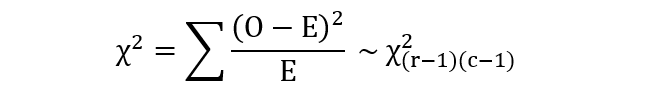

In [ ]:
# is there a difference between having diabetes in individuals taller or shorter than 180cm?


In [ ]:
conditions = [df['50-0.0']<180, df['50-0.0']>=180]
choices = ['short', 'tall']
df['height'] = np.select(conditions, choices, default= None)

In [ ]:
conditions = [df['2443-0.0']==0, df['2443-0.0']==1]
choices = ['no', 'yes']
df['diabetes'] = np.select(conditions, choices, default= None)

In [ ]:
df.dropna(subset= ['height','diabetes'], inplace =True)

In [ ]:
# create contingency table
data_crosstab = pd.crosstab(df['height'],
                            df['diabetes'],
                           margins=True, margins_name="Total")

In [ ]:
data_crosstab

diabetes,no,yes,Total
height,,,
short,16336,929,17265
tall,2418,129,2547
Total,18754,1058,19812


## Exercise 3
Calculate the chi-square statistics according to the formula above and then retrieve the critical value from the chi-squared distribution for the probability and number of degrees of freedom.

```
degrees_freedom = (len(rows)-1)*(len(columns)-1)
stats.distributions.chi2.sf(chi_square, degrees_freedom)
```

Lastly, validate your results with the pre-made function:

```
scipy.stats.chi2_contingency(contingency_table, 1)
```




Find an appropriate way to plot the data.

# K-S test

Does the BMI follow a normal distribution in the population?

In [ ]:
from scipy.stats import kstest

#perform Kolmogorov-Smirnov test
kstest(df['BMI'], 'norm')

KstestResult(statistic=nan, pvalue=nan)

In [ ]:
df_clean = df.dropna(subset = ['BMI'])

In [ ]:
kstest(df_clean['BMI'], 'norm')

KstestResult(statistic=1.0, pvalue=0.0)

Interpretation?

In [ ]:
kstest?

In [ ]:
kstest(df_clean['BMI'], 'norm')

In [ ]:
# Is female BMI distributed in the same way as male BMI?

In [ ]:
from scipy.stats import ks_2samp
ks_2samp(df_clean['31-0.0'] == 0, df_clean['31-0.0'] == 1)

Ks_2sampResult(statistic=0.08584360070404823, pvalue=4.5885622071368556e-64)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


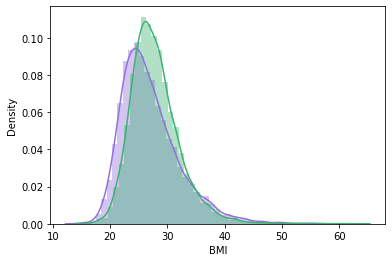

In [ ]:
sns.distplot(df_clean[df_clean['31-0.0'] == 0]['BMI'], color='mediumpurple')
sns.distplot(df_clean[df_clean['31-0.0'] == 1]['BMI'], color='mediumseagreen')
# plt.xlim(0,100)